In [106]:
import numpy as np
import matplotlib.pyplot as plt

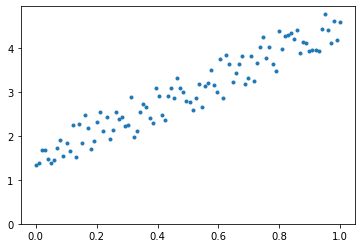

In [107]:
# Beispieldaten erzeugen
X = np.linspace(0, 1, 100)
y = 3 * X + 1 + np.random.rand(X.shape[0])

# Beispieldaten visualisieren
plt.plot(X, y, ".")
plt.ylim(bottom = 0);

In [108]:
from sklearn.linear_model import LinearRegression

modell = LinearRegression(fit_intercept = True)
modell.fit(X.reshape(-1, 1), y)

modell.coef_, modell.intercept_

(array([3.03847982]), 1.475238494518421)

In [109]:
print(f"Modell: y_hat = {round(modell.coef_[0], 2)} * x + {round(modell.intercept_, 2)}")

Modell: y_hat = 3.04 * x + 1.48


In [110]:
y_hat = modell.predict(X.reshape(-1, 1))
se = sum((y - y_hat)**2)
mse = se/len(y)
rmse = np.sqrt(mse)

print(f"Sum of Squared Errors: {round(np.sum(se), 3)}")
print(f"Mean Squared Error: {round(mse, 3)}")
print(f"Root Mean Squared Error: {round(rmse, 3)}")

Sum of Squared Errors: 7.312
Mean Squared Error: 0.073
Root Mean Squared Error: 0.27


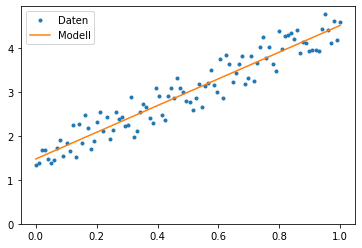

In [111]:
plt.plot(X, y, ".", label = "Daten")
plt.plot(X, y_hat, label = "Modell")
plt.ylim(bottom = 0)
plt.legend();

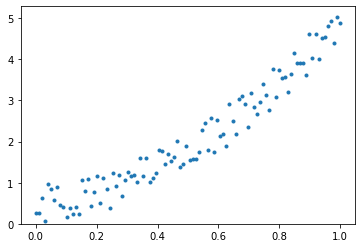

In [192]:
# Beispieldaten erzeugen
X = np.linspace(0, 1, 100)
y = 4 * X**2 + .5 * X + np.random.rand(X.shape[0])

# Beispieldaten visualisieren
plt.plot(X, y, ".")
plt.ylim(bottom = 0);

In [193]:
modell = LinearRegression(fit_intercept = True)
modell.fit(X.reshape(-1, 1), y)

modell.coef_, modell.intercept_

(array([4.47925749]), -0.14640176773157254)

In [194]:
print(f"Modell: y_hat = {round(modell.coef_[0], 2)} * x + {round(modell.intercept_, 2)}")

Modell: y_hat = 4.48 * x + -0.15


Sum of Squared Errors: 15.526
Mean Squared Error: 0.155
Root Mean Squared Error: 0.394


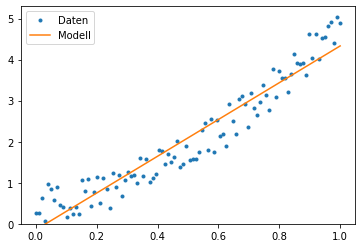

In [195]:
y_hat = modell.predict(X.reshape(-1, 1))
se = sum((y - y_hat)**2)
mse = se/len(y)
rmse = np.sqrt(mse)

print(f"Sum of Squared Errors: {round(np.sum(se), 3)}")
print(f"Mean Squared Error: {round(mse, 3)}")
print(f"Root Mean Squared Error: {round(rmse, 3)}")

plt.plot(X, y, ".", label = "Daten")
plt.plot(X, y_hat, label = "Modell")
plt.ylim(bottom = 0)
plt.legend();

In [201]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ("poly_transform", PolynomialFeatures(3)), # Grad des Polynoms
    ("linear_regression", LinearRegression())
])

pipe.fit(X.reshape(-1, 1), y)

Pipeline(steps=[('poly_transform', PolynomialFeatures(degree=3)),
                ('linear_regression', LinearRegression())])

Sum of Squared Errors: 8.226
Mean Squared Error: 0.082
Root Mean Squared Error: 0.287


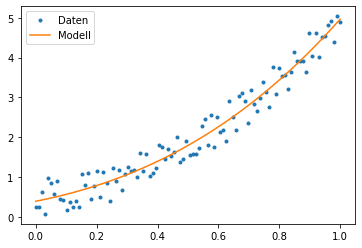

In [202]:
y_hat = pipe.predict(X.reshape(-1, 1))

se = sum((y - y_hat)**2)
mse = se/len(y)
rmse = np.sqrt(mse)

print(f"Sum of Squared Errors: {round(np.sum(se), 3)}")
print(f"Mean Squared Error: {round(mse, 3)}")
print(f"Root Mean Squared Error: {round(rmse, 3)}")

plt.plot(X, y, '.', label = "Daten")
plt.plot(X, y_hat, label = "Modell")
plt.legend();

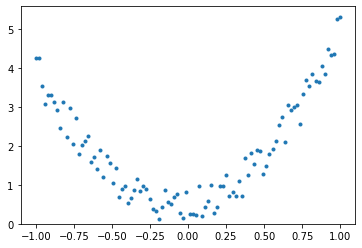

In [203]:
# Testdaten erzeugen
X_test = np.linspace(-1, 1, 100)
y_test = 4 * X_test**2 + .5 * X_test + np.random.rand(X_test.shape[0])

# Beispieldaten visualisieren
plt.plot(X_test, y_test, ".")
plt.ylim(bottom = 0);

Sum of Squared Errors: 122.842
Mean Squared Error: 1.228
Root Mean Squared Error: 1.108


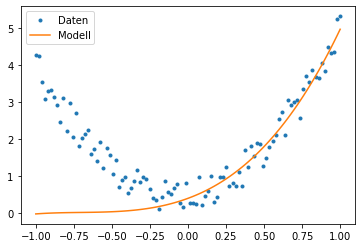

In [204]:
y_hat_test = pipe.predict(X_test.reshape(-1, 1))

se = sum((y - y_hat_test)**2)
mse = se/len(y)
rmse = np.sqrt(mse)

print(f"Sum of Squared Errors: {round(np.sum(se), 3)}")
print(f"Mean Squared Error: {round(mse, 3)}")
print(f"Root Mean Squared Error: {round(rmse, 3)}")

plt.plot(X_test, y_test, '.', label = "Daten")
plt.plot(X_test, y_hat_test, label = "Modell")
plt.legend();

In [205]:
print(pipe[0].get_feature_names())
pipe[1].coef_

['1', 'x0', 'x0^2', 'x0^3']


array([0.        , 1.51882228, 2.07629651, 0.97910189])